# Sklearn Discrete MinMaxNorm

In [2]:
import pandas as pd
decimalDf = pd.read_csv('../decimal_minmaxnorm_dataset.csv')

In [3]:
X = decimalDf[['WHITE',
            'BLACK_OR_AFRICAN_AMERICAN',
            'AMERICAN_INDIAN_AND_ALASKA_NATIVE',
            'ASIAN',
            'NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER',
            'HISPANIC_OR_LATINO'
            ]]
y = decimalDf['GrowthRate']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import time

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)
models = {}
rmseValues = {}
trainingTimes = {}
predictionTimes = {}

In [5]:
def processModel(model, modelKey):
    # Train Model
    print('----- ----- -----')
    print('Training model', modelKey)
    trainingStartTime = time.time()
    trainedModel = model.fit(X_train, y_train)
    trainingTime = time.time() - trainingStartTime
    print('Finished training in ' + str(trainingTime) + 's')

    # Predict
    print('Predicting on model', modelKey)
    predictionStartTime = time.time()
    modelPredictions = trainedModel.predict(X_test)
    predictionTime = time.time() - predictionStartTime
    print('Finished predictions in ' + str(predictionTime) + 's')

    # Get Accuracy
    print('Getting RMSE on model', modelKey)
    rmse = root_mean_squared_error(y_test, modelPredictions)

    # Finished
    print()
    print('Finished processing model', modelKey)
    print('RMSE: ' + str(rmse))
    print('Training time: ' + str(trainingTime) + 's')
    print('Prediction time: ' + str(predictionTime) + 's')
    print('----- ----- -----')

    return (rmse, trainingTime, predictionTime)

In [6]:
# Set Model Properties
model = 'Linear Regression'
from sklearn.linear_model import LinearRegression
models[model] = LinearRegression()
rmseValues[model], trainingTimes[model], predictionTimes[model] = processModel(models[model], model)

----- ----- -----
Training model Linear Regression
Finished training in 0.05109095573425293s
Predicting on model Linear Regression
Finished predictions in 0.00344085693359375s
Getting RMSE on model Linear Regression

Finished processing model Linear Regression
RMSE: 0.022881842900936138
Training time: 0.05109095573425293s
Prediction time: 0.00344085693359375s
----- ----- -----


In [7]:
# Set Model Properties
model = 'Ridge Regression'
from sklearn.linear_model import Ridge
models[model] = Ridge()
rmseValues[model], trainingTimes[model], predictionTimes[model] = processModel(models[model], model)

----- ----- -----
Training model Ridge Regression
Finished training in 0.014837026596069336s
Predicting on model Ridge Regression
Finished predictions in 0.0031049251556396484s
Getting RMSE on model Ridge Regression

Finished processing model Ridge Regression
RMSE: 0.02288129782806974
Training time: 0.014837026596069336s
Prediction time: 0.0031049251556396484s
----- ----- -----


In [8]:
# Set Model Properties
model = 'Ridge Cross Validation Regression'
from sklearn.linear_model import RidgeCV
models[model] = RidgeCV()
rmseValues[model], trainingTimes[model], predictionTimes[model] = processModel(models[model], model)

----- ----- -----
Training model Ridge Cross Validation Regression
Finished training in 0.14770722389221191s
Predicting on model Ridge Cross Validation Regression
Finished predictions in 0.0027179718017578125s
Getting RMSE on model Ridge Cross Validation Regression

Finished processing model Ridge Cross Validation Regression
RMSE: 0.022880803189170625
Training time: 0.14770722389221191s
Prediction time: 0.0027179718017578125s
----- ----- -----


In [9]:
# Set Model Properties
model = 'Huber Regression (Outlier Robust)'
from sklearn.linear_model import HuberRegressor
models[model] = HuberRegressor()
rmseValues[model], trainingTimes[model], predictionTimes[model] = processModel(models[model], model)

----- ----- -----
Training model Huber Regression (Outlier Robust)
Finished training in 1.640641212463379s
Predicting on model Huber Regression (Outlier Robust)
Finished predictions in 0.001867055892944336s
Getting RMSE on model Huber Regression (Outlier Robust)

Finished processing model Huber Regression (Outlier Robust)
RMSE: 0.022921626446803102
Training time: 1.640641212463379s
Prediction time: 0.001867055892944336s
----- ----- -----


In [10]:
# Set Model Properties
model = 'Decision Tree Regression'
from sklearn.tree import DecisionTreeRegressor
models[model] = DecisionTreeRegressor()
rmseValues[model], trainingTimes[model], predictionTimes[model] = processModel(models[model], model)

----- ----- -----
Training model Decision Tree Regression
Finished training in 2.0209059715270996s
Predicting on model Decision Tree Regression
Finished predictions in 0.04684710502624512s
Getting RMSE on model Decision Tree Regression

Finished processing model Decision Tree Regression
RMSE: 0.03193055054818941
Training time: 2.0209059715270996s
Prediction time: 0.04684710502624512s
----- ----- -----


In [11]:
resultsDf = pd.DataFrame(index=models.keys(), columns=['RMSE', 'TrainingTime', 'PredictionTime'])
resultsDf['RMSE'] = rmseValues.values()
resultsDf['TrainingTime'] = trainingTimes.values()
resultsDf['PredictionTime'] = predictionTimes.values()
resultsDf = resultsDf.sort_values(by='RMSE', ascending=True)

resultsDf

,RMSE,TrainingTime,PredictionTime
Ridge Cross Validation Regression,0.022881,0.147707,0.002718
Ridge Regression,0.022881,0.014837,0.003105
Linear Regression,0.022882,0.051091,0.003441
Huber Regression (Outlier Robust),0.022922,1.640641,0.001867
Decision Tree Regression,0.031931,2.020906,0.046847


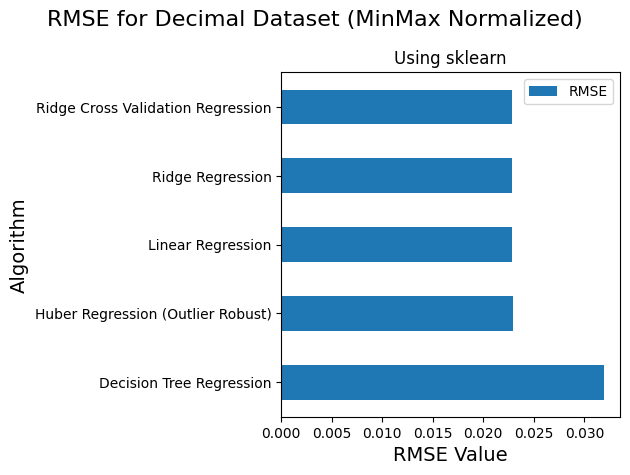

In [20]:
import matplotlib.pyplot as plt
toPlot = resultsDf.drop(['TrainingTime', 'PredictionTime'], axis=1)
toPlot = toPlot.sort_values('RMSE', ascending=False)
ax = toPlot.plot.barh()
plt.title('Using sklearn', fontsize=12)
plt.suptitle('RMSE for Decimal Dataset (MinMax Normalized)', fontsize=16)
plt.xlabel('RMSE Value', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)
plt.tight_layout()